In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
import datetime
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline

pd.options.display.max_columns = 999
pd.options.display.max_rows = 100

sns.set_style("whitegrid")
# plt.rcParams.update({'font.size': 32})
# sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 2})  
# plt.rcParams['figure.figsize'] = 10, 6

from datetime import datetime
str(datetime.now())

'2017-11-10 16:32:44.772583'

In [34]:
df = data.read_data('Vansjo/VAN1_data_2017_02_28_10_55.xlsx')
plotter = ResultsPlotter(f='../IO/ecomac_2_RMSDxR_2017_11_10.mat')
results = plotter.env_getter('water', basin=1)

/Users/imarkelo/git/MyLake_v2_Vansjo/Postproc_code/data.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)


Text(0.05,0.5,'Phosphorus Concentration, $[mg / m^3]$')

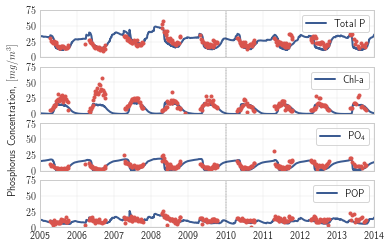

In [35]:
fig, axes = plt.subplots(4,1,sharey=True, sharex=True)

x = 'SampleDate'
env = 'water'

results = plotter.env_getter(env)
# for d,c in zip([5,], sns.color_palette()):

inx = np.where(results['z'][0, 0] == 4)[0][0]
TOTP = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['DOP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0)
Chl = np.mean(results['concentrations'][0, 0]['C'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['Chl']
                                                                                      [0, 0][0:inx, :], axis=0)
PO4 = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0)
Part = np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0)


axes[0].plot(-366 + results['days'][0, 0][0], TOTP, c=sns.xkcd_rgb["denim blue"], lw=2, label='Total P')
axes[1].plot(-366 + results['days'][0, 0][0], Chl, c=sns.xkcd_rgb["denim blue"], lw=2, label='Chl-a')
axes[2].plot(-366 + results['days'][0, 0][0], PO4, c=sns.xkcd_rgb["denim blue"], lw=2, label=r'PO\textsubscript{4}')
axes[3].plot(-366 + results['days'][0, 0][0], Part, c=sns.xkcd_rgb["denim blue"], lw=2, label='POP')




variable = 'TOTP'
axes[0].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

Chl = np.loadtxt('../obs/store_obs/Cha_aquaM_march_2017.dat', delimiter=',')
axes[1].plot(-366 + Chl[:, 0], Chl[:, 1], 'bo', c=sns.xkcd_rgb["pale red"], markersize=3)

variable = 'PO4-P'
axes[2].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

variable = 'POP'
axes[3].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)


for ax in axes:
    ax.grid(linestyle='-', linewidth=0.2)
    ax.set_ylim([0, 75])
    ax.set_xlim([732313 - 366, 735234 ])
    ax.plot((732313+366*4-1, 732313+366*4-1), (0, 100), 'k--', lw=0.3)
#     ax.set_ylabel(r'$[mg / m^3]$')
    ax.legend(loc=1, frameon=1)
    ax.set_xticks([], [])
    ax.set_yticks([0,25,50,75])
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter(' '))    

axes[3].xaxis.set_major_locator(mdates.MonthLocator(interval=12))
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   


fig.text(0.05, 0.5, r'Phosphorus Concentration, $[mg / m^3]$', va='center', rotation='vertical')

In [36]:
import extra_methods
import metrics

In [37]:
df['date2num'] = df.SampleDate.apply(extra_methods.convert_timestamp_to_num)

### Chl-a metrics

In [38]:
x = 'SampleDate'
env = 'water'
results = plotter.env_getter(env)
inx = np.where(results['z'][0, 0] == 4)[0][0]
Chl_s = np.mean(results['concentrations'][0, 0]['C'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['Chl'][0, 0][0:inx, :], axis=0)
Chl_o = np.loadtxt('../obs/store_obs/Cha_aquaM_march_2017.dat', delimiter=',')

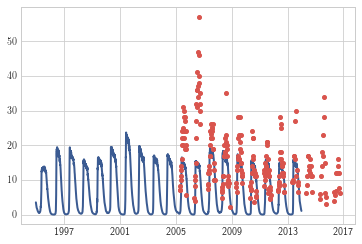

In [39]:
plt.plot(-366 + results['days'][0, 0][0], Chl_s, c=sns.xkcd_rgb["denim blue"], lw=2, label='Chl-a')
plt.plot_date(-366+Chl_o[:, 0], Chl_o[:, 1], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4)

In [40]:
days_sim = results['days'][0, 0][0]
days_obs = Chl_o[:, 0]

In [41]:
extra_methods.run_metrics(days_sim, Chl_s, Chl_o[:, 0], Chl_o[:, 1], calibration_end_date='2010-01-01')

Metrics                            During calibration            After calibration             
mae                           	 7.841438180544761             	 4.655849412430226             
rmse                          	 10.815429670780562            	 5.829953187336692             
correlation                   	 0.5051457492082893            	 0.48484554714747263           
rsquared                      	 -0.20146622971714967          	 -0.01343259359412352          
pc_bias                       	 -34.951388398317285           	 -13.883145096964371           
likelihood                    	 0.0024606465248555097         	 0.006300268874705826          
NS                            	 -0.2014662297171519           	 -0.013432593594123743         


In [42]:
extra_methods.generate_latex_table(days_sim, Chl_s, Chl_o[:, 0], Chl_o[:, 1], calibration_end_date='2010-01-01')

 & 7.84 / 4.66 & -34.95 / -13.88 & 10.82 / 5.83 & 0.51 / 0.48 & -0.20 / -0.01 \\


### Total P metrics

In [43]:
df['date2num'] = df.SampleDate.apply(extra_methods.convert_timestamp_to_num)
env = 'water'
x = 'SampleDate'

In [44]:
variable = 'TOTP'
results = plotter.env_getter(env)
inx = np.where(results['z'][0, 0] == 4)[0][0]
TOTP_s = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['DOP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0)

In [45]:
TOTP_o = np.array([df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)]['date2num'].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values])

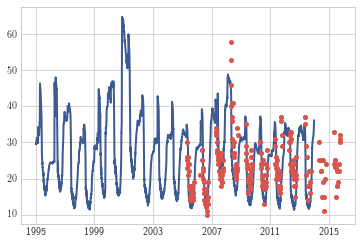

In [46]:
plt.plot(-366 + results['days'][0, 0][0], TOTP_s, c=sns.xkcd_rgb["denim blue"], lw=2, label='Total P')
plt.plot_date(-366+TOTP_o[0, :], TOTP_o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4)

In [47]:
extra_methods.run_metrics(results['days'][0, 0][0], TOTP_s, TOTP_o[0,:], TOTP_o[1, :], calibration_end_date='2010-01-01')

Metrics                            During calibration            After calibration             
mae                           	 5.456318739849593             	 6.999046316170475             
rmse                          	 6.7138859849177495            	 8.071650871961932             
correlation                   	 0.7085709847641721            	 0.5724581726134338            
rsquared                      	 0.2512635488975863            	 -1.011950916626284            
pc_bias                       	 -4.128411378297046            	 -20.269454648206548           
likelihood                    	 0.023666795297641936          	 4.276653801956792e-05         
NS                            	 0.25126354889758595           	 -1.0119509166262843           


In [48]:
extra_methods.generate_latex_table(results['days'][0, 0][0], TOTP_s, TOTP_o[0,:], TOTP_o[1, :], calibration_end_date='2010-01-01')

 & 5.46 / 7.00 & -4.13 / -20.27 & 6.71 / 8.07 & 0.71 / 0.57 & 0.25 / -1.01 \\


### PO4 metrics

In [49]:
variable = 'PO4-P'
results = plotter.env_getter(env)
inx = np.where(results['z'][0, 0] == 4)[0][0]

In [50]:
PO4_s = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0)

In [51]:
PO4_o = np.array([df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)]['date2num'].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values])

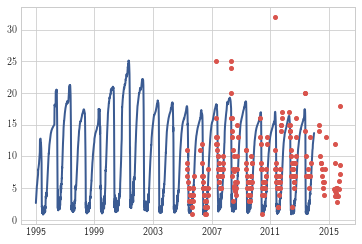

In [52]:
plt.plot(-366 + results['days'][0, 0][0], PO4_s, c=sns.xkcd_rgb["denim blue"], lw=2, label='PO4')
plt.plot_date(-366+PO4_o[0, :], PO4_o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4)

In [53]:
extra_methods.run_metrics(results['days'][0, 0][0], PO4_s, PO4_o[0,:], PO4_o[1, :], calibration_end_date='2010-01-01')

Metrics                            During calibration            After calibration             
mae                           	 3.810409146794734             	 4.8621964997271565            
rmse                          	 4.740618006580544             	 5.688616658239356             
correlation                   	 0.648266492298153             	 0.648317562479592             
rsquared                      	 -0.130984602975611            	 -0.38131751652067214          
pc_bias                       	 -18.994526173533497           	 -40.01796035380071            
likelihood                    	 0.0035002425430339782         	 0.0010011683784016353         
NS                            	 -0.13098460297561165          	 -0.3813175165206717           


In [54]:
extra_methods.generate_latex_table(results['days'][0, 0][0], PO4_s, PO4_o[0,:], PO4_o[1, :], calibration_end_date='2010-01-01')

 & 3.81 / 4.86 & -18.99 / -40.02 & 4.74 / 5.69 & 0.65 / 0.65 & -0.13 / -0.38 \\


### PP metrics

In [55]:
variable = 'POP'
results = plotter.env_getter(env)
inx = np.where(results['z'][0, 0] == 4)[0][0]

In [56]:
PP_s = np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0)

In [57]:
PP_o = np.array([df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)]['date2num'].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values])

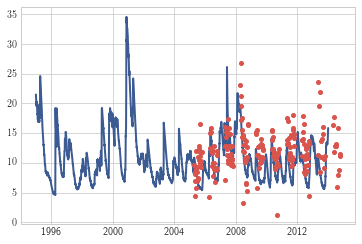

In [58]:
plt.plot(-366 + results['days'][0, 0][0], PP_s, c=sns.xkcd_rgb["denim blue"], lw=2, label='PP')
plt.plot_date(-366+PP_o[0, :], PP_o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4)

In [59]:
extra_methods.run_metrics(results['days'][0, 0][0], PP_s, PP_o[0,:], PP_o[1, :], calibration_end_date='2010-01-01')

Metrics                            During calibration            After calibration             
mae                           	 3.142604189458416             	 3.903050424114751             
rmse                          	 3.949975519995277             	 4.80201373914451              
correlation                   	 0.48899354645199994           	 0.40988296184973083           
rsquared                      	 -0.26044630792423207          	 -1.223612490633192            
pc_bias                       	 -10.777160181449505           	 -30.280867408543166           
likelihood                    	 0.0018322115589502147         	 1.4841808617359917e-05        
NS                            	 -0.2604463079242314           	 -1.2236124906331924           


In [60]:
extra_methods.generate_latex_table(results['days'][0, 0][0], PP_s, PP_o[0,:], PP_o[1, :], calibration_end_date='2010-01-01')

 & 3.14 / 3.90 & -10.78 / -30.28 & 3.95 / 4.80 & 0.49 / 0.41 & -0.26 / -1.22 \\


### Oxygen



Depth: 0m
Metrics                            During calibration            After calibration             
mae                           	 1.2602496401790515            	 0.9442291455990967            
rmse                          	 1.7289233661675976            	 1.1164552859601935            
correlation                   	 0.4982926863998488            	 0.5991929718472618            
rsquared                      	 0.2417332708688289            	 0.21677909232286874           
pc_bias                       	 0.5319184405531863            	 4.812629285459687             
likelihood                    	 0.02256548741033172           	 0.019918535703547412          
NS                            	 0.2417332708688288            	 0.21677909232286896           


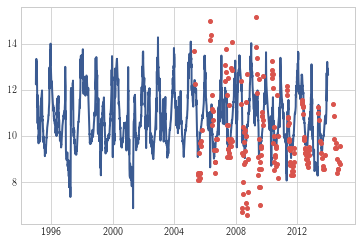



Depth: 5m
Metrics                            During calibration            After calibration             
mae                           	 1.3674848567769293            	 0.7665211295156662            
rmse                          	 1.786073813813553             	 0.9157571381371209            
correlation                   	 0.47534192980612233           	 0.7224904277075017            
rsquared                      	 0.20914832803703298           	 0.4587147593689679            
pc_bias                       	 -2.56574845511332             	 3.214930955390637             
likelihood                    	 0.019172882658359768          	 0.06677502115639015           
NS                            	 0.2091483280370332            	 0.4587147593689679            


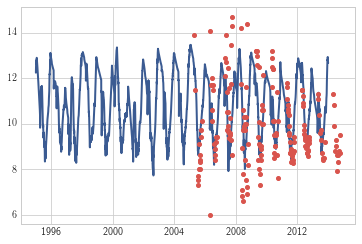



Depth: 10m
Metrics                            During calibration            After calibration             
mae                           	 1.650866328679551             	 1.1827242853286113            
rmse                          	 2.1008651415177906            	 1.3872509443052106            
correlation                   	 0.5384333830217334            	 0.7314656688735024            
rsquared                      	 0.27940973908811595           	 0.3440516185377821            
pc_bias                       	 -1.2152271728156254           	 7.65418475037176              
likelihood                    	 0.0272432007011984            	 0.03763796963850597           
NS                            	 0.27940973908811584           	 0.34405161853778166           


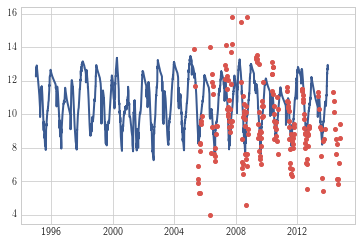



Depth: 15m
Metrics                            During calibration            After calibration             
mae                           	 1.9354464310799753            	 1.6209265882631578            
rmse                          	 2.5441913559857112            	 1.907237732743869             
correlation                   	 0.5628937327840623            	 0.756690849892257             
rsquared                      	 0.2738788083751239            	 0.17401320972639323           
pc_bias                       	 3.2540156188273963            	 13.88853762655327             
likelihood                    	 0.026500121578716743          	 0.016083941109813683          
NS                            	 0.2738788083751238            	 0.17401320972639345           


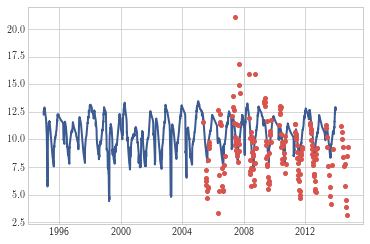



Depth: 20m
Metrics                            During calibration            After calibration             
mae                           	 1.9997888603475957            	 1.9410024478894166            
rmse                          	 2.5463843569763758            	 2.276664845710826             
correlation                   	 0.5943754493502202            	 0.7255048221521903            
rsquared                      	 0.23644756726001115           	 -0.0030401826989057135        
pc_bias                       	 9.162609405938088             	 18.446702033402843            
likelihood                    	 0.021976926670304098          	 0.006636298581322853          
NS                            	 0.23644756726001037           	 -0.0030401826989057135        


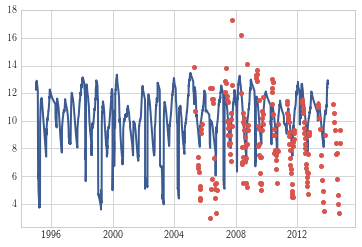



Depth: 25m
Metrics                            During calibration            After calibration             
mae                           	 2.1373517962994173            	 2.1832514373406076            
rmse                          	 2.708474859016794             	 2.569035705638176             
correlation                   	 0.6092437610016449            	 0.5902434649156166            
rsquared                      	 0.18636114435740148           	 -0.17012238344347552          
pc_bias                       	 12.71168792459974             	 20.733962684192626            
likelihood                    	 0.0171082533782762            	 0.0028781374372777095         
NS                            	 0.18636114435740148           	 -0.17012238344347597          


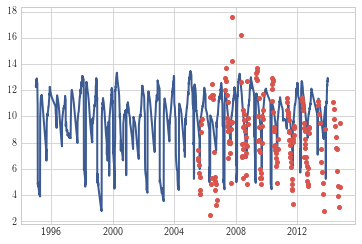



Depth: 30m
Metrics                            During calibration            After calibration             
mae                           	 2.2530010121037805            	 2.2488486953968803            
rmse                          	 2.8820346298279214            	 2.6713610042895084            
correlation                   	 0.5625517450727046            	 0.6102924536856615            
rsquared                      	 0.16249738621075127           	 -0.11940960370316778          
pc_bias                       	 13.3709486280556              	 22.179685105579082            
likelihood                    	 0.015183999516667776          	 0.003708795869522884          
NS                            	 0.16249738621075094           	 -0.11940960370316756          


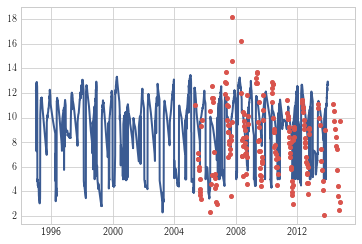



Depth: 35m
Metrics                            During calibration            After calibration             
mae                           	 2.466527393502947             	 2.318968865616661             
rmse                          	 3.1296275513527703            	 2.704707957864737             
correlation                   	 0.4890430781547851            	 0.6849545135454926            
rsquared                      	 0.05661609181483307           	 0.05654039477360351           
pc_bias                       	 17.375743571537107            	 23.399500791601398            
likelihood                    	 0.008942683733645304          	 0.00893929970059249           
NS                            	 0.056616091814832625          	 0.056540394773603286          


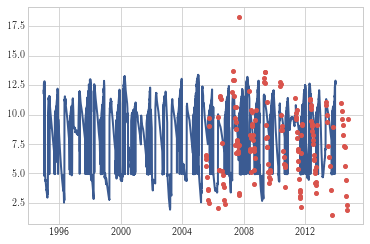



Depth: 40m
Metrics                            During calibration            After calibration             
mae                           	 2.272601485053032             	 3.165097514918009             
rmse                          	 2.8759793863327               	 3.740952034724342             
correlation                   	 0.5590988807728767            	 0.42908869127431204           
rsquared                      	 0.22176838740387372           	 -0.20821044380065512          
pc_bias                       	 11.569679558781532            	 28.259918078538263            
likelihood                    	 0.02042168274400186           	 0.002379054309997389          
NS                            	 0.22176838740387372           	 -0.20821044380065512          


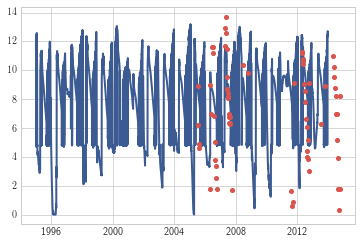

In [61]:
variable_s = 'O2'
variable_o = 'O2'
days_sim = results['days'][0, 0][0]
for d in [0,5,10,15,20,25, 30, 35, 40]:
    inx = np.where(results['z'][0, 0] == d)[0][0]
    s = results['concentrations'][0, 0][variable_s][0, 0][inx, :]/1000
    o = np.array([df[(np.isfinite(df[variable_o])) & (df['Depth1'] == d)]['date2num'].values, df[(np.isfinite(df[variable_o])) & (df.Depth1 == d)][variable_o].values])
    print('\n\nDepth: {}m'.format(d))
    extra_methods.run_metrics(results['days'][0, 0][0], s, o[0,:], o[1, :], calibration_end_date='2010-01-01')
    plt.plot(-366 + results['days'][0, 0][0], s, c=sns.xkcd_rgb["denim blue"], lw=2)
    plt.plot_date(-366+o[0, :], o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4, label=variable_o)
    plt.show(block=False)

### Generate table for Latex

In [62]:
variable_s = 'O2'
variable_o = 'O2'
days_sim = results['days'][0, 0][0]
for d in [0,5,10,15,20,25, 30, 35, 40]:
    print('&', end=' ')
    print(d, end=' ')
    inx = np.where(results['z'][0, 0] == d)[0][0]
    s = results['concentrations'][0, 0][variable_s][0, 0][inx, :]/1000
    o = np.array([df[(np.isfinite(df[variable_o])) & (df['Depth1'] == d)]['date2num'].values, df[(np.isfinite(df[variable_o])) & (df.Depth1 == d)][variable_o].values])
    extra_methods.generate_latex_table(results['days'][0, 0][0], s, o[0,:], o[1, :], calibration_end_date='2010-01-01')

& 0  & 1.26 / 0.94 & 0.53 / 4.81 & 1.73 / 1.12 & 0.50 / 0.60 & 0.24 / 0.22 \\
& 5  & 1.37 / 0.77 & -2.57 / 3.21 & 1.79 / 0.92 & 0.48 / 0.72 & 0.21 / 0.46 \\
& 10  & 1.65 / 1.18 & -1.22 / 7.65 & 2.10 / 1.39 & 0.54 / 0.73 & 0.28 / 0.34 \\
& 15  & 1.94 / 1.62 & 3.25 / 13.89 & 2.54 / 1.91 & 0.56 / 0.76 & 0.27 / 0.17 \\
& 20  & 2.00 / 1.94 & 9.16 / 18.45 & 2.55 / 2.28 & 0.59 / 0.73 & 0.24 / -0.00 \\
& 25  & 2.14 / 2.18 & 12.71 / 20.73 & 2.71 / 2.57 & 0.61 / 0.59 & 0.19 / -0.17 \\
& 30  & 2.25 / 2.25 & 13.37 / 22.18 & 2.88 / 2.67 & 0.56 / 0.61 & 0.16 / -0.12 \\
& 35  & 2.47 / 2.32 & 17.38 / 23.40 & 3.13 / 2.70 & 0.49 / 0.68 & 0.06 / 0.06 \\
& 40  & 2.27 / 3.17 & 11.57 / 28.26 & 2.88 / 3.74 & 0.56 / 0.43 & 0.22 / -0.21 \\


### Temperature



Depth: 0m
Metrics                            During calibration            After calibration             
mae                           	 1.1966007981418068            	 1.1220042426042227            
rmse                          	 1.4034029691464491            	 1.3317381827388677            
correlation                   	 0.9762083025123136            	 0.9873334671414695            
rsquared                      	 0.8824075949116071            	 0.8994956117129906            
pc_bias                       	 -6.665120242328977            	 -7.486473231298194            
likelihood                    	 0.5554581415749531            	 0.605002952114533             
NS                            	 0.8824075949116071            	 0.8994956117129906            


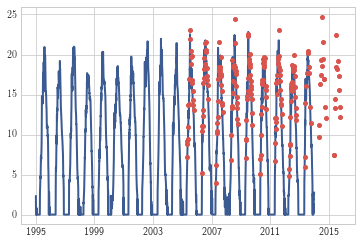



Depth: 5m
Metrics                            During calibration            After calibration             
mae                           	 1.0598035899715106            	 1.1959785156960894            
rmse                          	 1.2614075358641672            	 1.4175356052281616            
correlation                   	 0.9802909390568186            	 0.9803239575111847            
rsquared                      	 0.8802791438148806            	 0.8938819453608441            
pc_bias                       	 -6.694076195601086            	 -7.810443908884604            
likelihood                    	 0.5495781577628               	 0.5882576344632702            
NS                            	 0.8802791438148805            	 0.8938819453608441            


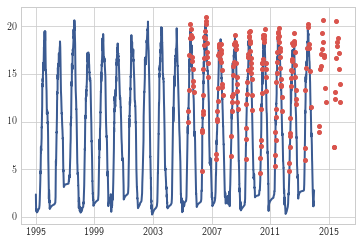



Depth: 10m
Metrics                            During calibration            After calibration             
mae                           	 1.0002378415385353            	 1.132531907166123             
rmse                          	 1.201133729863697             	 1.41016097426194              
correlation                   	 0.9383204279380911            	 0.9433203445565103            
rsquared                      	 0.8505188422523899            	 0.8615278165968354            
pc_bias                       	 -1.7776516231187138           	 -4.610349676890078            
likelihood                    	 0.4735935622446998            	 0.5003932863651658            
NS                            	 0.85051884225239              	 0.8615278165968354            


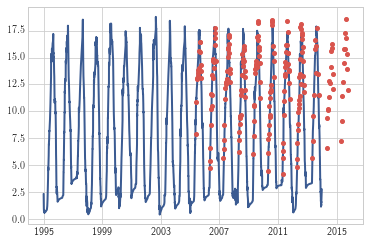



Depth: 15m
Metrics                            During calibration            After calibration             
mae                           	 1.115034602944099             	 0.962229698937603             
rmse                          	 1.3506724890301438            	 1.1393703502474966            
correlation                   	 0.9098151253243026            	 0.944510441111602             
rsquared                      	 0.7769268623054261            	 0.8351553793802822            
pc_bias                       	 -0.686625286110244            	 -1.2198891253346114           
likelihood                    	 0.3277953859850816            	 0.43857558815942393           
NS                            	 0.7769268623054261            	 0.8351553793802822            


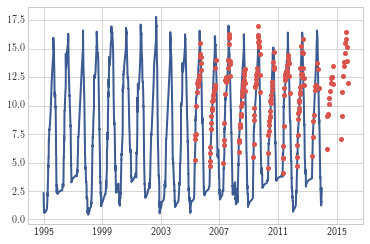



Depth: 20m
Metrics                            During calibration            After calibration             
mae                           	 1.073042176493203             	 0.9004574469379938            
rmse                          	 1.3125105011562341            	 1.062390455480036             
correlation                   	 0.9002538619834095            	 0.9545213542331181            
rsquared                      	 0.7435409126113617            	 0.8233177192947962            
pc_bias                       	 -2.553695337721378            	 -4.1800219529426546           
likelihood                    	 0.2773998152955502            	 0.4133703306060988            
NS                            	 0.7435409126113617            	 0.8233177192947962            


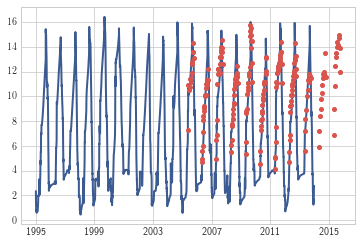



Depth: 25m
Metrics                            During calibration            After calibration             
mae                           	 1.073776480118036             	 0.9203116138276247            
rmse                          	 1.3669874086036147            	 1.1048458325195756            
correlation                   	 0.8858716013123094            	 0.949774192701193             
rsquared                      	 0.6932502937065659            	 0.7872034526736539            
pc_bias                       	 -4.03611970384004             	 -6.1361335173322455           
likelihood                    	 0.21572549597836038           	 0.34507871221285413           
NS                            	 0.6932502937065657            	 0.7872034526736539            


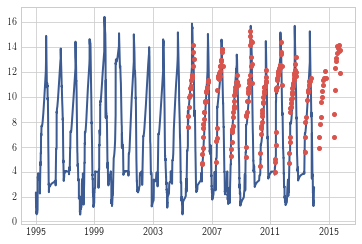



Depth: 30m
Metrics                            During calibration            After calibration             
mae                           	 1.1189922225042699            	 1.0095117164333558            
rmse                          	 1.3971757127208406            	 1.2027255753797719            
correlation                   	 0.8751622240396764            	 0.9325187811666344            
rsquared                      	 0.6494855703603059            	 0.7045013948918538            
pc_bias                       	 -4.920870150347297            	 -7.547249656321347            
likelihood                    	 0.17332754546186088           	 0.2282090861951518            
NS                            	 0.6494855703603056            	 0.7045013948918539            


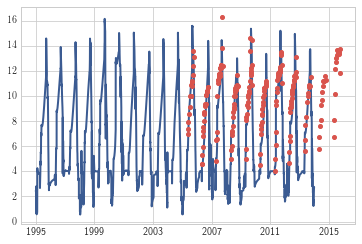



Depth: 35m
Metrics                            During calibration            After calibration             
mae                           	 1.1797194623086507            	 1.1809042046537253            
rmse                          	 1.4786836688070624            	 1.5137495636728993            
correlation                   	 0.8689414592665607            	 0.8713366298592385            
rsquared                      	 0.5277538191645378            	 0.4351015658492535            
pc_bias                       	 -5.152880501443455            	 -9.557994427852591            
likelihood                    	 0.09430407244903269           	 0.059338783148799194          
NS                            	 0.5277538191645379            	 0.43510156584925364           


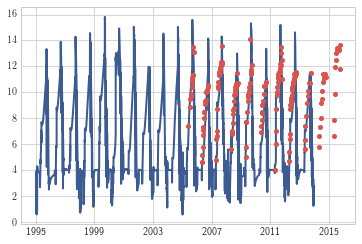



Depth: 40m
Metrics                            During calibration            After calibration             
mae                           	 1.1088690636019607            	 1.675764162837136             
rmse                          	 1.477463441065641             	 2.1873318054526734            
correlation                   	 0.8594535303123664            	 0.6937112223358161            
rsquared                      	 0.5269025553633657            	 -0.15981619963742677          
pc_bias                       	 -7.811018525661665            	 -11.894900321761018           
likelihood                    	 0.09390353724063069           	 0.003030338352549475          
NS                            	 0.5269025553633657            	 -0.159816199637427            


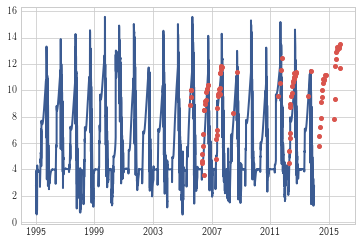

In [63]:
variable_o = 'Temperatur'
days_sim = results['days'][0, 0][0]
for d in [0,5,10,15,20,25, 30, 35, 40]:
    inx = np.where(results['z'][0, 0] == d)[0][0]
    s = results['T'][0, 0][inx, :]
    o = np.array([df[(np.isfinite(df[variable_o])) & (df['Depth1'] == d)]['date2num'].values, df[(np.isfinite(df[variable_o])) & (df.Depth1 == d)][variable_o].values])
    print('\n\nDepth: {}m'.format(d))
    extra_methods.run_metrics(results['days'][0, 0][0], s, o[0,:], o[1, :], calibration_end_date='2010-01-01')
    plt.figure()
    plt.plot(-366 + results['days'][0, 0][0], s, c=sns.xkcd_rgb["denim blue"], lw=2)
    plt.plot_date(-366+o[0, :], o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4, label=variable_o)
    plt.show(block=False)

In [64]:
variable_o = 'Temperatur'
days_sim = results['days'][0, 0][0]
days_sim = results['days'][0, 0][0]
for d in [0,5,10,15,20,25, 30, 35, 40]:
    inx = np.where(results['z'][0, 0] == d)[0][0]
    s = results['T'][0, 0][inx, :]
    o = np.array([df[(np.isfinite(df[variable_o])) & (df['Depth1'] == d)]['date2num'].values, df[(np.isfinite(df[variable_o])) & (df.Depth1 == d)][variable_o].values])
    print('&', end=' ')
    print(d, end=' ')
    extra_methods.generate_latex_table(results['days'][0, 0][0], s, o[0,:], o[1, :], calibration_end_date='2010-01-01')

& 0  & 1.20 / 1.12 & -6.67 / -7.49 & 1.40 / 1.33 & 0.98 / 0.99 & 0.88 / 0.90 \\
& 5  & 1.06 / 1.20 & -6.69 / -7.81 & 1.26 / 1.42 & 0.98 / 0.98 & 0.88 / 0.89 \\
& 10  & 1.00 / 1.13 & -1.78 / -4.61 & 1.20 / 1.41 & 0.94 / 0.94 & 0.85 / 0.86 \\
& 15  & 1.12 / 0.96 & -0.69 / -1.22 & 1.35 / 1.14 & 0.91 / 0.94 & 0.78 / 0.84 \\
& 20  & 1.07 / 0.90 & -2.55 / -4.18 & 1.31 / 1.06 & 0.90 / 0.95 & 0.74 / 0.82 \\
& 25  & 1.07 / 0.92 & -4.04 / -6.14 & 1.37 / 1.10 & 0.89 / 0.95 & 0.69 / 0.79 \\
& 30  & 1.12 / 1.01 & -4.92 / -7.55 & 1.40 / 1.20 & 0.88 / 0.93 & 0.65 / 0.70 \\
& 35  & 1.18 / 1.18 & -5.15 / -9.56 & 1.48 / 1.51 & 0.87 / 0.87 & 0.53 / 0.44 \\
& 40  & 1.11 / 1.68 & -7.81 / -11.89 & 1.48 / 2.19 & 0.86 / 0.69 & 0.53 / -0.16 \\
